In [1]:
# Dependdencies and set up 

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.stats as st
import seaborn as sns

In [2]:
latest=pd.read_csv("CSVs/historical_RAPTOR_by_team.csv")
historical=pd.read_csv("CSVs/latest_RAPTOR_by_team.csv")

In [3]:
merged=pd.merge(latest,historical,how="outer")
merged.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,NaN,NaN,NaN,NaN,NaN,NaN
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,NaN,NaN,NaN,NaN,NaN,NaN
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,NaN,NaN,NaN,NaN,NaN,NaN
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,NaN,NaN,NaN,NaN,NaN,NaN
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
merged.fillna(0,inplace=True)
clean_df=merged
clean_df.isnull().sum()
clean_df.head()

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,0.0,0.0,0.0,0.0,0.0,0.0
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,0.0,0.0,0.0,0.0,0.0,0.0
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,0.0,0.0,0.0,0.0,0.0,0.0
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,0.0,0.0,0.0,0.0,0.0,0.0
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
clean_df.columns

Index(['player_name', 'player_id', 'season', 'season_type', 'team', 'poss',
       'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact',
       'raptor_box_offense', 'raptor_box_defense', 'raptor_box_total',
       'raptor_onoff_offense', 'raptor_onoff_defense', 'raptor_onoff_total'],
      dtype='object')

### Q4 minutes played vs pace impact in relevance to raptor total

In [6]:
df=clean_df[["player_name","mp","raptor_total","pace_impact"]]
df.head()

,player_name,mp,raptor_total,pace_impact
0,Kareem Abdul-Jabbar,467,9.639006,-0.432080
1,Kareem Abdul-Jabbar,3016,7.342679,-0.513828
2,Zaid Abdul-Aziz,195,-2.295249,-0.751147
3,Tom Abernethy,214,-0.800928,-0.425337
4,Tom Abernethy,1378,0.057838,-0.315821


In [7]:
# Get the totals of minutes played,pace impact and raptor totals of each player.

avg_mp=df.groupby("player_name")["mp"].sum()
avg_pace_impact=df.groupby("player_name")["pace_impact"].sum()
avg_raptor_total=df.groupby("player_name")["raptor_total"].sum()

# Make it into a Dataframe

avg_by_player = pd.DataFrame({"Total Minutes Played": avg_mp,
                             "Total Pace Impact": avg_pace_impact,
                             "Total RAPTOR Scores": avg_raptor_total})
avg_by_player=avg_by_player.reset_index()

# Display the Dataframe

avg_by_player.head()

,player_name,Total Minutes Played,Total Pace Impact,Total RAPTOR Scores
0,A.C. Green,40671,-14.631130,-5.311204
1,A.J. Bramlett,61,0.527413,-9.820485
2,A.J. English,3108,0.003283,-8.779331
3,A.J. Guyton,1246,-0.242884,-16.723745
4,A.J. Lawson,108,4.132765,-29.105705


In [52]:
# function for bar plot

def bar_plot(x_axis,y_axis,ylabel,title,size):
    fig, ax = plt.subplots(figsize=(size))
    bar_container= ax.bar(x_axis,y_axis,alpha=0.5,color="#F94C10")
    ax.bar_label(bar_container,fmt='{:,.0f}')
    plt.xlabel("Player Names",weight="bold")
    plt.ylabel(ylabel,weight="bold")
    plt.title(f"Top 10  {title}",weight="bold")
    plt.xticks(rotation=45)

    plt.show()

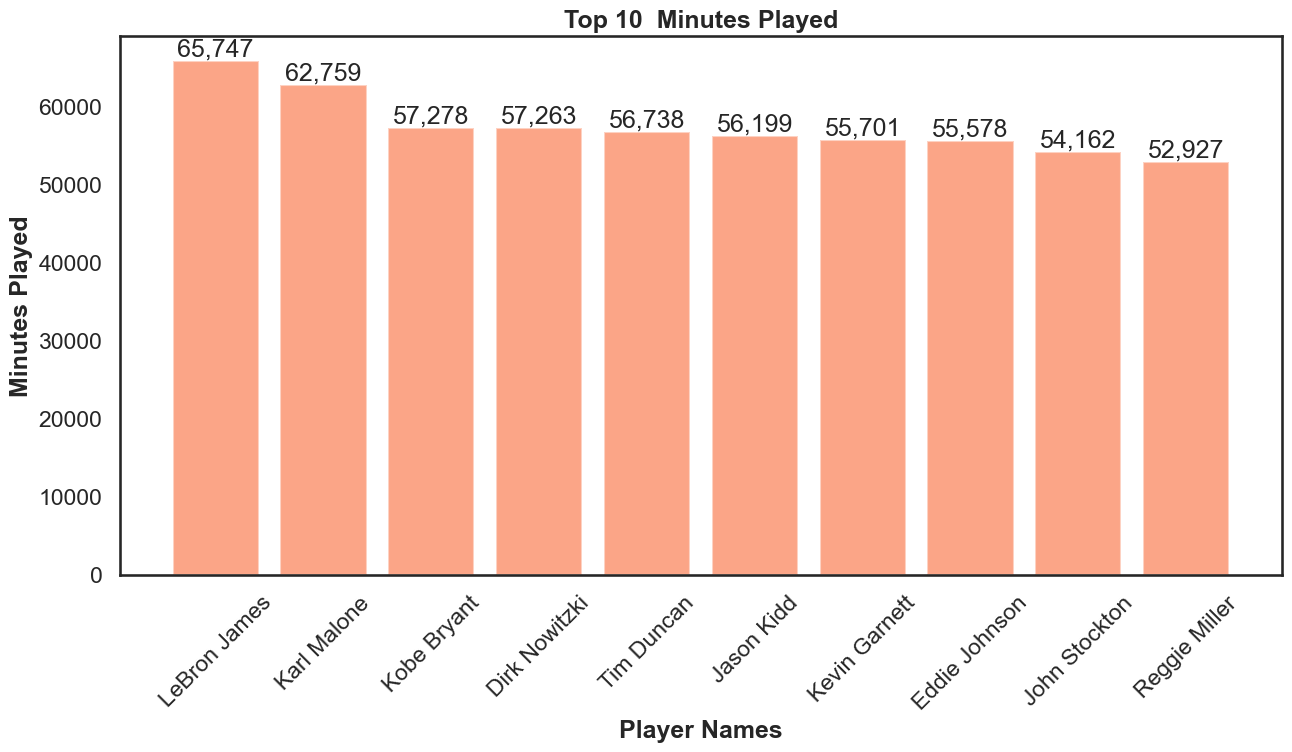

In [57]:
# Minutes played for top ten players

top_ten_mp=avg_by_player[["player_name","Total Minutes Played"]].\
sort_values(by="Total Minutes Played",ascending=False).head(10)

mp=top_ten_mp["Total Minutes Played"]
player_names=top_ten_mp["player_name"]

bar_plot(player_names,mp,"Minutes Played","Minutes Played",(15,7))


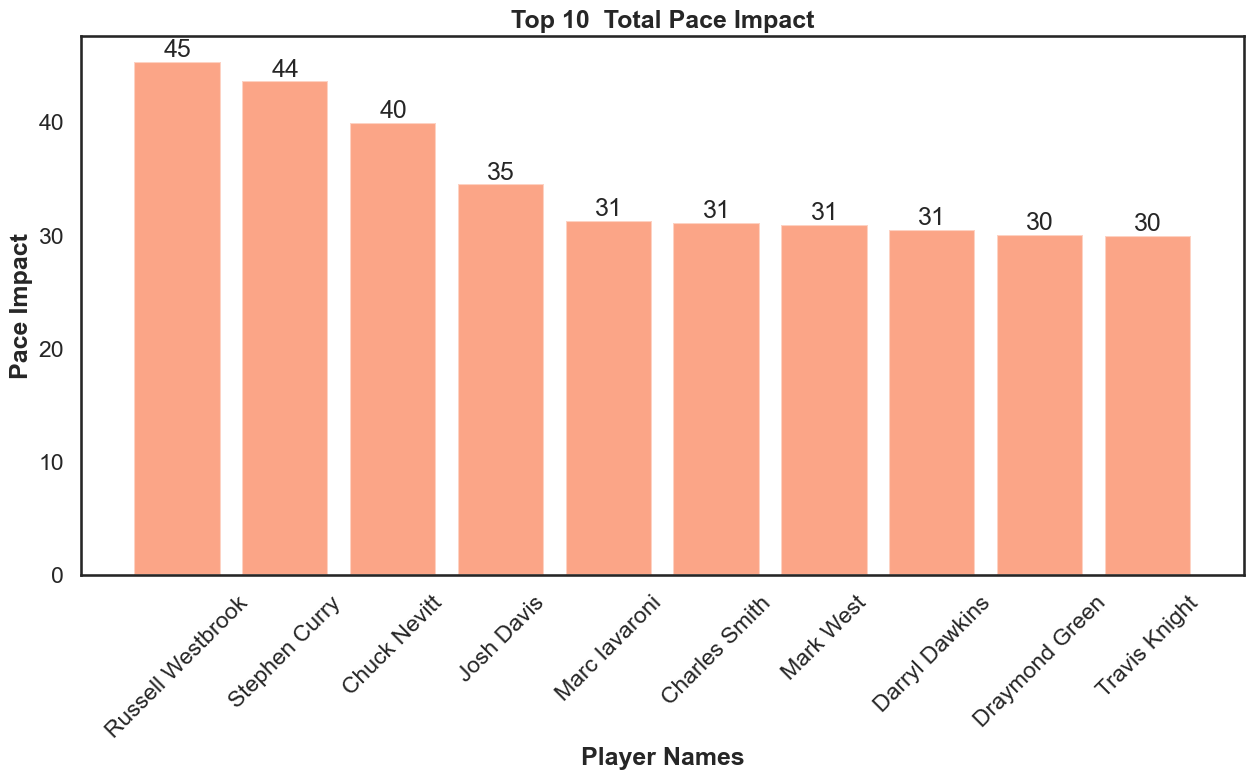

In [59]:
# Top 10 total pace impact players

top_ten_pace_impact=avg_by_player[["player_name","Total Pace Impact"]].\
sort_values(by="Total Pace Impact",ascending=False).head(10)

pace_imapct=top_ten_pace_impact["Total Pace Impact"]
player_names=top_ten_pace_impact["player_name"]

bar_plot(player_names,pace_imapct,"Pace Impact","Total Pace Impact",(15,7))

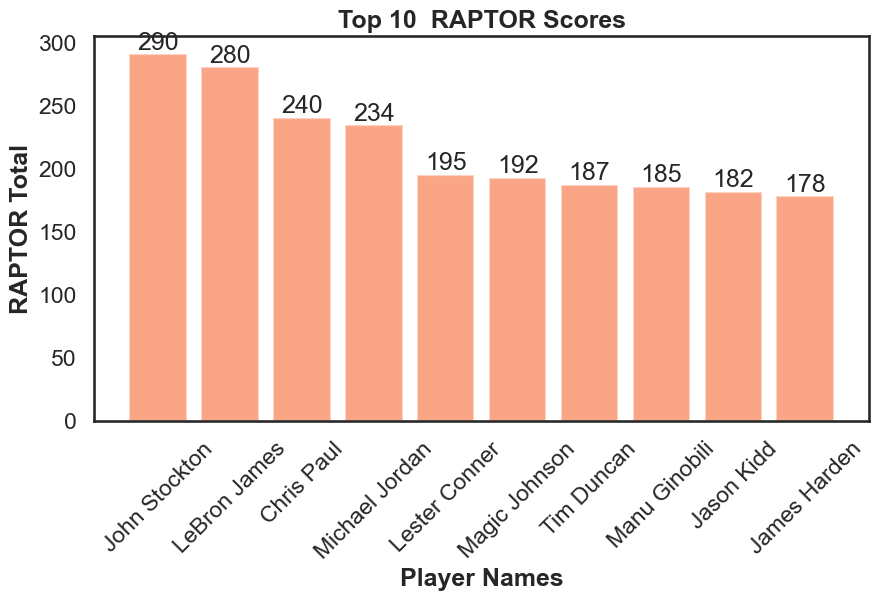

In [61]:
# top 10 total RAPTOR scores for players

top_ten_raptor_total=avg_by_player[["player_name","Total RAPTOR Scores"]].\
sort_values(by="Total RAPTOR Scores",ascending=False).head(10)

raptor_total=top_ten_raptor_total["Total RAPTOR Scores"]
player_names=top_ten_raptor_total["player_name"]

bar_plot(player_names,raptor_total,"RAPTOR Total","RAPTOR Scores",(10,5))

In [12]:
# Averages of various features by teams.

total_players=clean_df.groupby("team")["player_name"].count()
raptor_total=clean_df.groupby("team")["raptor_total"].mean()
poss=clean_df.groupby("team")["poss"].mean()
war_total=clean_df.groupby("team")["war_total"].mean()
pace_impact=clean_df.groupby("team")["pace_impact"].mean()
raptor_onoff_total=clean_df.groupby("team")["raptor_onoff_total"].mean()
avg_mp_team=clean_df.groupby("team")["mp"].mean()
avg_raptor_offense=clean_df.groupby("team")["raptor_offense"].mean()
avg_raptor_defense=clean_df.groupby("team")["raptor_defense"].mean()

avg_summary = pd.DataFrame({"Total Players": total_players,
          "Raptor Total": raptor_total,
          "Possessions": poss,
          "War Total": war_total,
          "Pace Impact": pace_impact,
          "Minutes Played":avg_mp_team,
          "Raptor On and Off Totals":raptor_onoff_total,
          "RAPTOR Offense": avg_raptor_offense,
          "RAPTOR Defense": avg_raptor_defense}).reset_index()
avg_summary.head()

,team,Total Players,Raptor Total,Possessions,War Total,Pace Impact,Minutes Played,Raptor On and Off Totals,RAPTOR Offense,RAPTOR Defense
0,ATL,1185,-1.570031,1642.004219,1.140147,0.263341,819.489451,0.018678,-1.187607,-0.382423
1,BOS,1222,-1.199087,1704.759411,1.448069,0.248033,838.174304,0.033699,-1.130326,-0.068761
2,BRK,340,-1.191441,1366.402941,0.843397,0.275703,666.041176,-0.316375,-1.077620,-0.113821
3,BUF,37,-2.715885,2382.189189,0.983682,0.180248,1068.513514,0.000000,-1.835151,-0.880735
4,CHA,380,-2.366248,1938.507895,0.952573,0.133151,975.000000,-0.145483,-1.909040,-0.457208


In [13]:
# function for regression plot

def regression_plot(x_axis,y_axis,xlabel,ylabel,text_coordinates):
    

    (slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis,y_axis)
    regress_values = x_axis * slope + intercept
    line_eq =  "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_axis,y_axis, marker=r'8',c="#F94C10",s=50,alpha=0.7,edgecolor="#F94C10")
    plt.plot(x_axis,regress_values,"r:",alpha=0.5)
    plt.xlabel(xlabel,weight="bold")
    plt.ylabel(ylabel,weight="bold")
    plt.title(f"{xlabel} vs {ylabel} by Teams",color="#F94C10",weight="bold")
    plt.grid(True,color="b",alpha=0.10)
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="#F94C10")
    for team, txt in enumerate(team_names):
        plt.annotate(txt, (x_axis[team], y_axis[team]), color="#F94C10",alpha=0.5)
    plt.show()
   

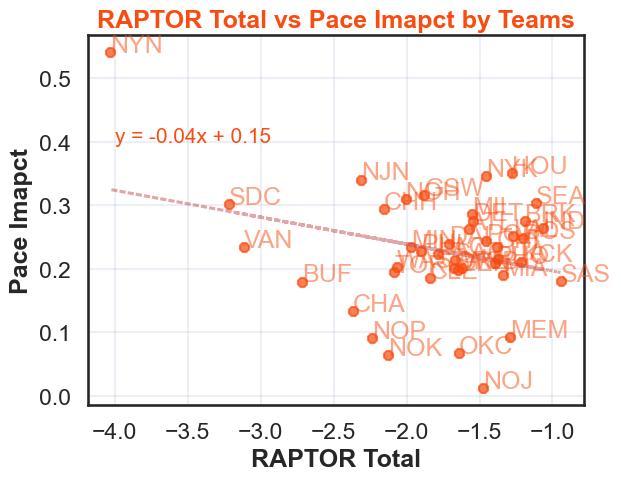

In [44]:
# RAPTOR scores vs avergae pace impact by teams

x_axis=avg_summary["Raptor Total"]
y_axis=avg_summary["Pace Impact"]
team_names = avg_summary["team"]

regression_plot(x_axis,y_axis,"RAPTOR Total","Pace Imapct",(-4,0.4))

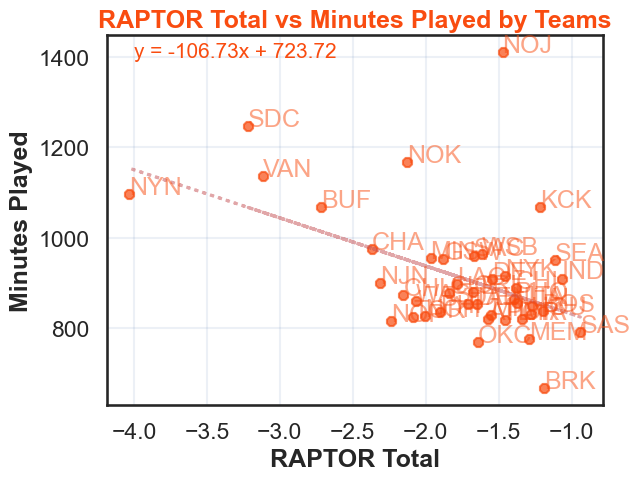

In [45]:
# RAPTOR scores vs avergae minutes played by teams

x_axis=avg_summary["Raptor Total"]
y_axis=avg_summary["Minutes Played"]

regression_plot(x_axis,y_axis,"RAPTOR Total","Minutes Played",(-4,1400))

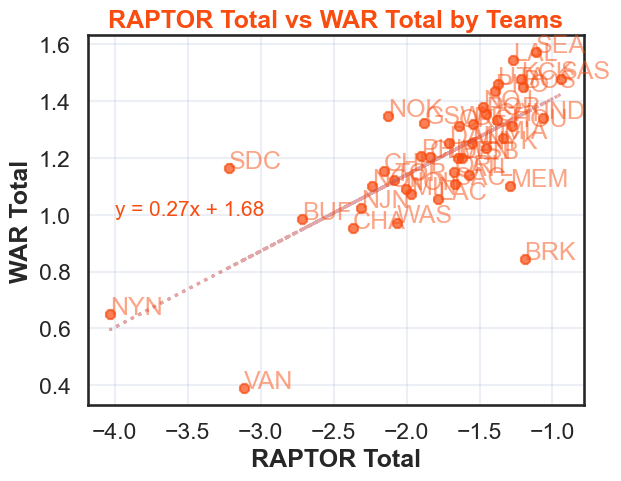

In [46]:
x_axis=avg_summary["Raptor Total"]
y_axis=avg_summary["War Total"]

regression_plot(x_axis,y_axis,"RAPTOR Total","WAR Total",(-4,1))

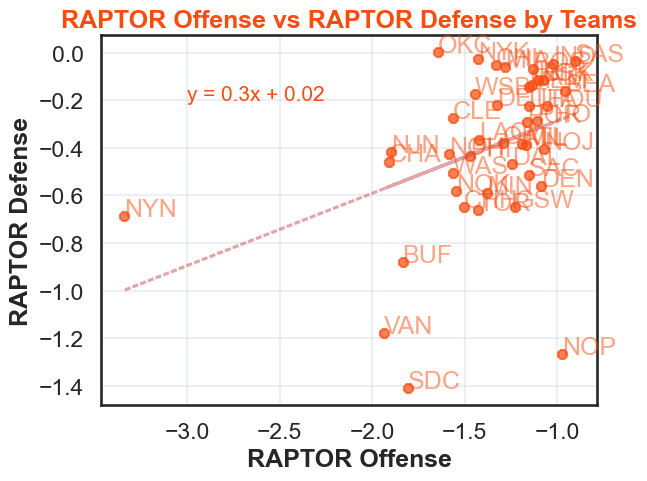

In [47]:
x_axis=avg_summary["RAPTOR Offense"]
y_axis=avg_summary["RAPTOR Defense"]

regression_plot(x_axis,y_axis,"RAPTOR Offense","RAPTOR Defense",(-3,-0.2))

In [18]:
clean_df

,player_name,player_id,season,season_type,team,poss,mp,raptor_offense,raptor_defense,raptor_total,...,predator_offense,predator_defense,predator_total,pace_impact,raptor_box_offense,raptor_box_defense,raptor_box_total,raptor_onoff_offense,raptor_onoff_defense,raptor_onoff_total
0,Kareem Abdul-Jabbar,abdulka01,1977,PO,LAL,1020,467,6.350694,3.288313,9.639006,...,6.592019,3.065131,9.657150,-0.432080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Kareem Abdul-Jabbar,abdulka01,1977,RS,LAL,6654,3016,4.267101,3.075579,7.342679,...,4.482404,2.556956,7.039361,-0.513828,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Zaid Abdul-Aziz,abdulza01,1977,RS,BUF,441,195,-1.926415,-0.368835,-2.295249,...,-1.817927,-1.624327,-3.442253,-0.751147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Tom Abernethy,abernto01,1977,PO,LAL,467,214,0.024715,-0.825643,-0.800928,...,-0.565843,-1.695077,-2.260920,-0.425337,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Tom Abernethy,abernto01,1977,RS,LAL,3040,1378,0.517829,-0.459991,0.057838,...,0.141415,-0.835555,-0.694139,-0.315821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30797,Omer Yurtseven,yurtsom01,2023,RS,MIA,177,83,2.486415,-7.487443,-5.001027,...,1.332271,-5.782120,-4.449850,0.241523,1.659495,-7.678176,-6.018681,5.109138,-4.382791,0.726346
30798,Cody Zeller,zelleco01,2023,PO,MIA,354,174,-3.408309,-1.285457,-4.693766,...,-3.123433,-2.253790,-5.377222,0.312978,-4.691477,-1.659638,-6.351115,3.038203,0.802259,3.840461
30799,Cody Zeller,zelleco01,2023,RS,MIA,447,217,-1.370539,-5.780102,-7.150641,...,-1.658070,-3.760831,-5.418901,0.311628,-1.382510,-5.605615,-6.988125,-1.018074,-4.713301,-5.731374
30800,Ivica Zubac,zubaciv01,2023,PO,LAC,274,130,-3.769316,8.511745,4.742429,...,-4.849337,5.794117,0.944780,0.534762,-3.282714,11.150790,7.868076,-4.475477,-5.323365,-9.798842


C:\Users\uzmaf\AppData\Local\Temp\ipykernel_25468\1143526365.py:9: UserWarning: 
The palette list has fewer values (6) than needed (42) and will cycle, which may produce an uninterpretable plot.
  g=sns.relplot(x=x_axis,


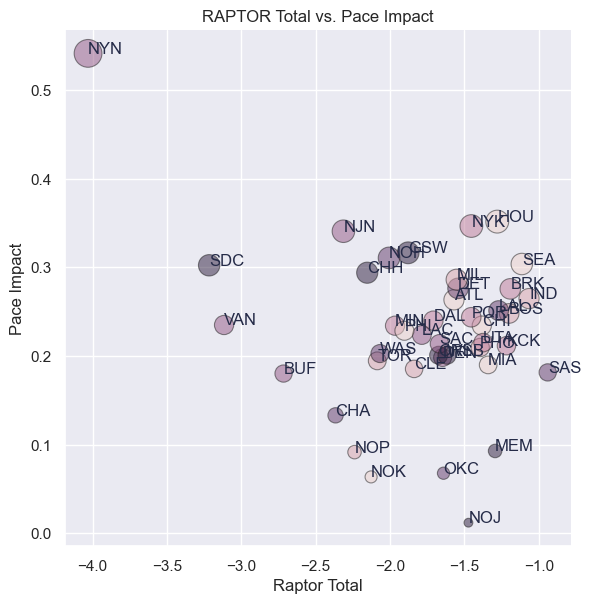

In [19]:
x_axis=avg_summary["Raptor Total"]
y_axis=avg_summary["Pace Impact"]
team_names = avg_summary["team"]

sns.set_theme(style="darkgrid")

cmap = sns.cubehelix_palette()

g=sns.relplot(x=x_axis,
              y=y_axis,
              size=y_axis,
              hue=team_names,
              sizes=(40, 400),
              alpha=0.5,
              data=avg_summary,
              height=6,
              edgecolor="k",
              palette=cmap
             )
g._legend.remove()
for team, txt in enumerate(team_names):
    plt.annotate(txt, (x_axis[team], y_axis[team]),color="#252B48")
plt.title("RAPTOR Total vs. Pace Impact")
plt.show()

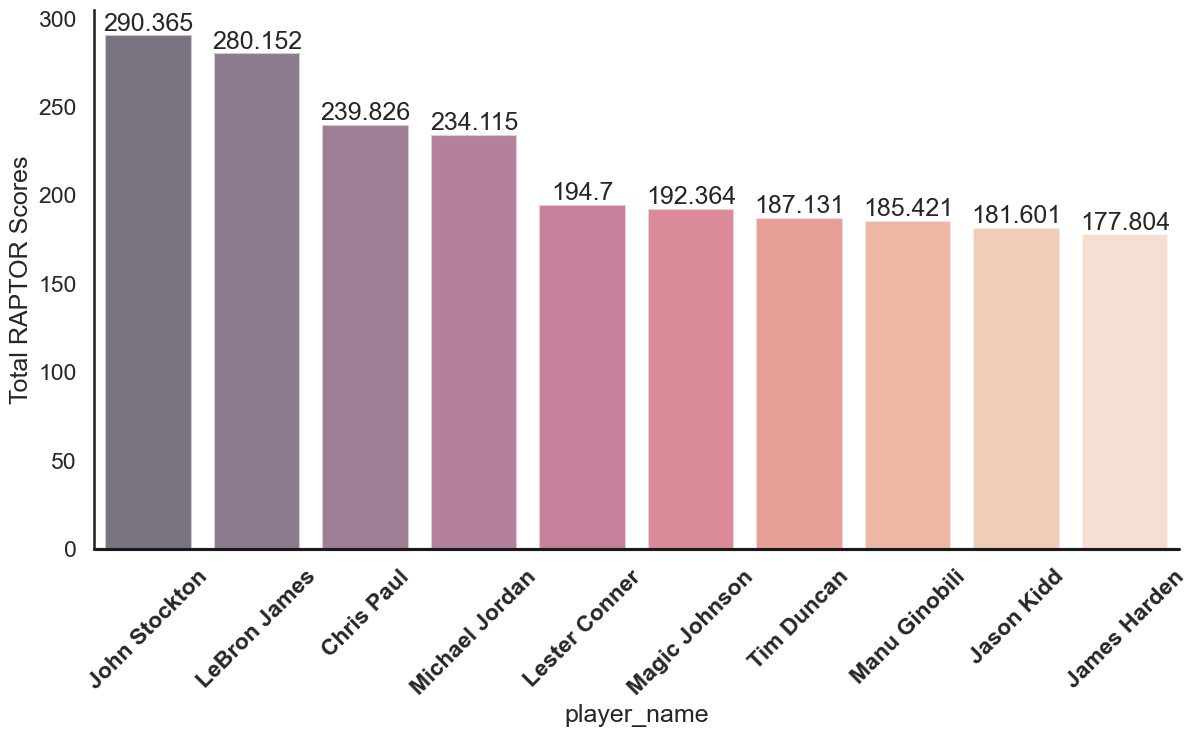

In [24]:
top_ten_raptor_total=avg_by_player[["player_name","Total RAPTOR Scores"]].\
sort_values(by="Total RAPTOR Scores",ascending=False).head(10)

raptor_total=top_ten_raptor_total["Total RAPTOR Scores"]
player_names1=top_ten_raptor_total["player_name"]

sns.set_theme(style="white", context="talk")
f, (ax1) = plt.subplots(figsize=(14, 7))

sns.barplot(x=player_names,y=raptor_total,palette="rocket",alpha=0.6)
for i in ax1.containers:
    ax1.bar_label(i,)
plt.xticks(rotation=45,weight="bold")

ax1.axhline(0,color="k",clip_on=False)
sns.despine(bottom=True)
plt.show()

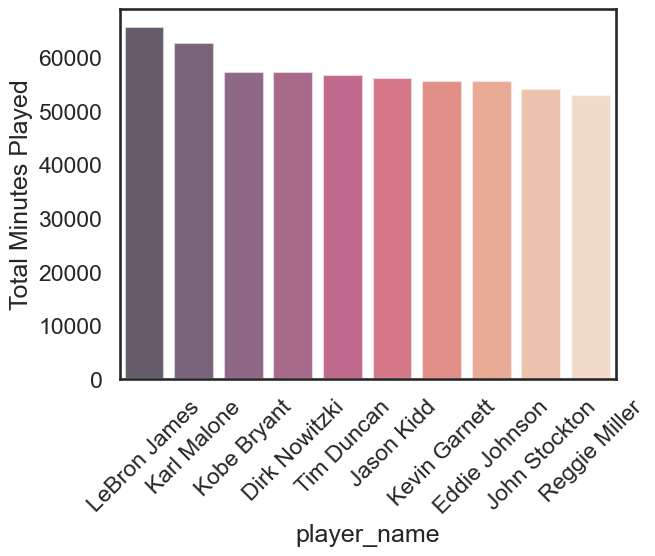

In [67]:
top_ten_mp=avg_by_player[["player_name","Total Minutes Played"]].\
sort_values(by="Total Minutes Played",ascending=False).head(10)

mp=top_ten_mp["Total Minutes Played"]
player_names=top_ten_mp["player_name"]

sns.barplot(x=player_names,y=mp,palette="rocket",alpha=0.7)
plt.xticks(rotation=45)
plt.show()